In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize,RegexpTokenizer
import string
import nltk
from nltk.corpus import stopwords
import en_core_web_sm
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import operator
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

In [2]:
rev=pd.read_csv('yelp/yelp_review.csv',encoding='UTF-8')

In [3]:
filt_condition='user_id'
filt_variable='CxDOIDnH8gp9KXzpBHJYXw'

In [4]:
rev1=rev[rev[filt_condition]==filt_variable]

In [5]:
rev1['tokenized_text'] = rev1['text'].apply(lambda x:x.lower()).apply(word_tokenize) 

/home/vishwa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
punctuation = list(string.punctuation)
stopWords = set(stopwords.words('english'))

In [7]:
docs=list(rev1['tokenized_text'])

In [8]:
filtered_docs=[]
for i in docs:
    filt = []
    for w in i:
        if w.lower()not in stopWords and w not in punctuation:
            filt.append(w)
    filtered_docs.append(filt)

In [9]:
nlp = en_core_web_sm.load()

In [10]:
final_txt=[[t.lemma_ for t in nlp(' '.join(i))] for i in filtered_docs]

In [11]:
model = gensim.models.Word2Vec(final_txt,size=150,window=10,min_count=10,workers=10,iter=10)

In [12]:
cv=CountVectorizer()
word_count_vector=cv.fit_transform([ ' '.join(i) for i in final_txt ])

In [13]:
vect = TfidfVectorizer()
tfidf_matrix = vect.fit_transform([ ' '.join(i) for i in final_txt ])

/home/vishwa/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [14]:
vocab = [v[0] for v in sorted(vect.vocabulary_.items(), key=operator.itemgetter(1))]


In [15]:
rev1['score']=rev1.stars-rev1.stars.mean()

/home/vishwa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
rev1=rev1.reset_index()

In [17]:
pos_lis=list(rev1[rev1.stars>4].index)
neg_lis=list(rev1[rev1.stars<2].index)

In [18]:
pos=np.ravel(tfidf_matrix.toarray()[pos_lis].sum(axis=0))
neg=np.ravel(tfidf_matrix.toarray()[neg_lis].sum(axis=0))

In [19]:
posd=dict(zip(vocab, pos))
negd=dict(zip(vocab, neg))

In [20]:
poswords=sorted(posd.items(),key=operator.itemgetter(1),reverse=True)
negwords=sorted(negd.items(),key=operator.itemgetter(1),reverse=True)

In [21]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)


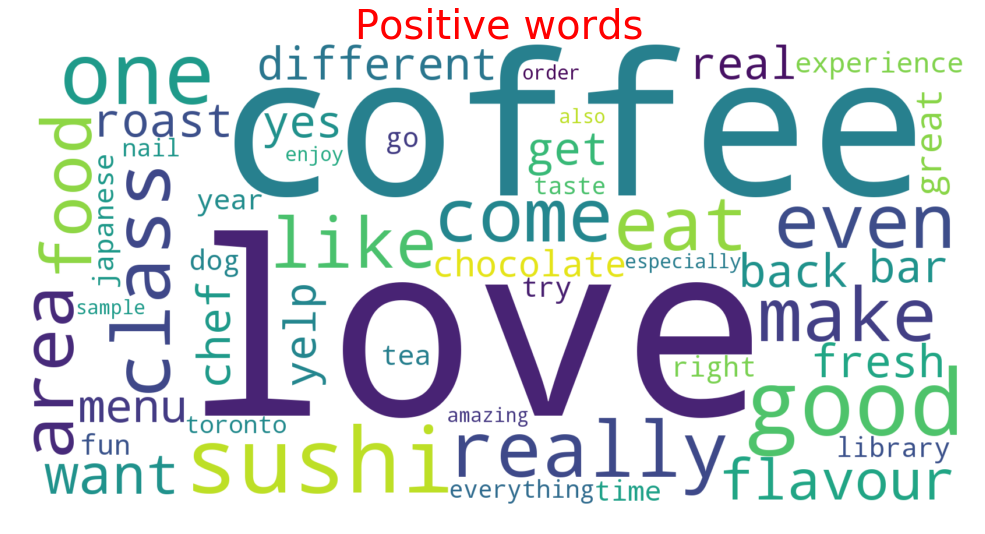

In [22]:
wordcloud.generate_from_frequencies(dict(poswords[:50]))
plt.figure(figsize=(20,10))
plt.title("Positive words", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

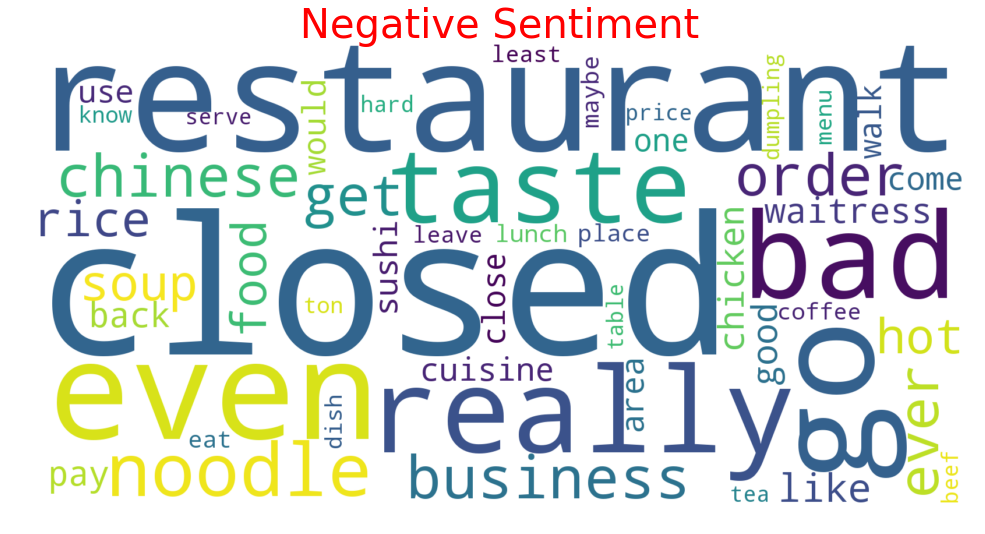

In [23]:
wordcloud.generate_from_frequencies(dict(negwords[:50]))
plt.figure(figsize=(20,10))
plt.title("Negative Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [27]:
model.most_similar(['sushi'],['love'])

/home/vishwa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'ayce', 0.7227889895439148),
 (u'box', 0.7063912153244019),
 (u'lunch', 0.6884738206863403),
 (u'chef', 0.6832404136657715),
 (u'chirashi', 0.6757073402404785),
 (u'sashimi', 0.5876891613006592),
 (u'bento', 0.5832119584083557),
 (u'pho', 0.5557130575180054),
 (u'cash', 0.5412328839302063),
 (u'arrive', 0.5399349331855774)]

In [41]:
model.most_similar(['restaurant'],topn=20)

/home/vishwa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'korean', 0.8062745332717896),
 (u'cantonese', 0.7880206108093262),
 (u'legend', 0.7870761752128601),
 (u'chinese', 0.7869129776954651),
 (u'runne', 0.7734830379486084),
 (u'family', 0.7623227834701538),
 (u'japanese', 0.7584470510482788),
 (u'joint', 0.7551518678665161),
 (u'vietnamese', 0.7330063581466675),
 (u'cuisine', 0.6959116458892822),
 (u'northern', 0.6902780532836914),
 (u'asian', 0.6855723857879639),
 (u'own', 0.6829551458358765),
 (u'ne', 0.6790719032287598),
 (u'previous', 0.6757645606994629),
 (u'surprised', 0.6722985506057739),
 (u'mandarian', 0.6614925265312195),
 (u'pho', 0.6529185175895691),
 (u'similar', 0.6487654447555542),
 (u'hole', 0.6288834810256958)]

/home/vishwa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


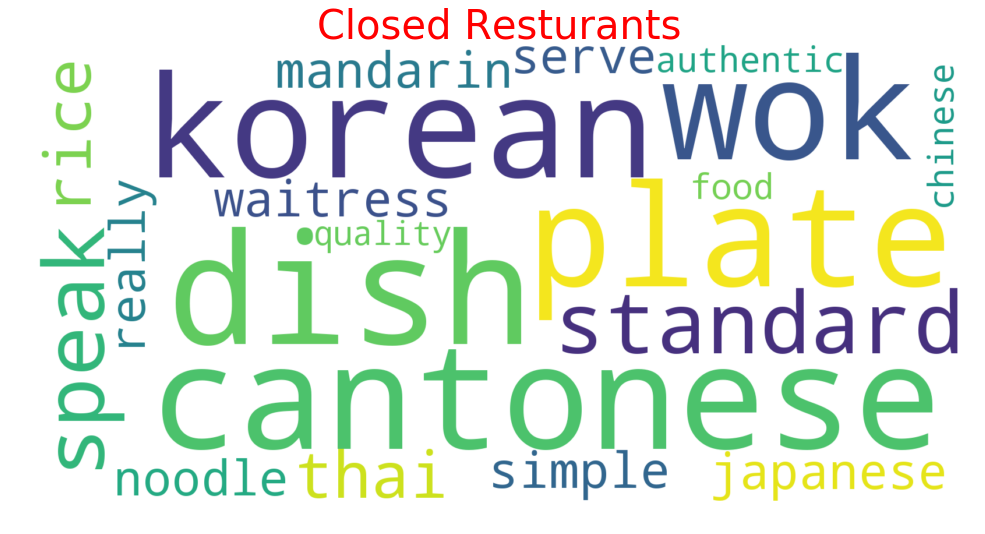

In [33]:
wordcloud.generate_from_frequencies(dict(model.most_similar(['restaurant'],['closed'],topn=20)))
plt.figure(figsize=(20,10))
plt.title("Closed Resturants", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

/home/vishwa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


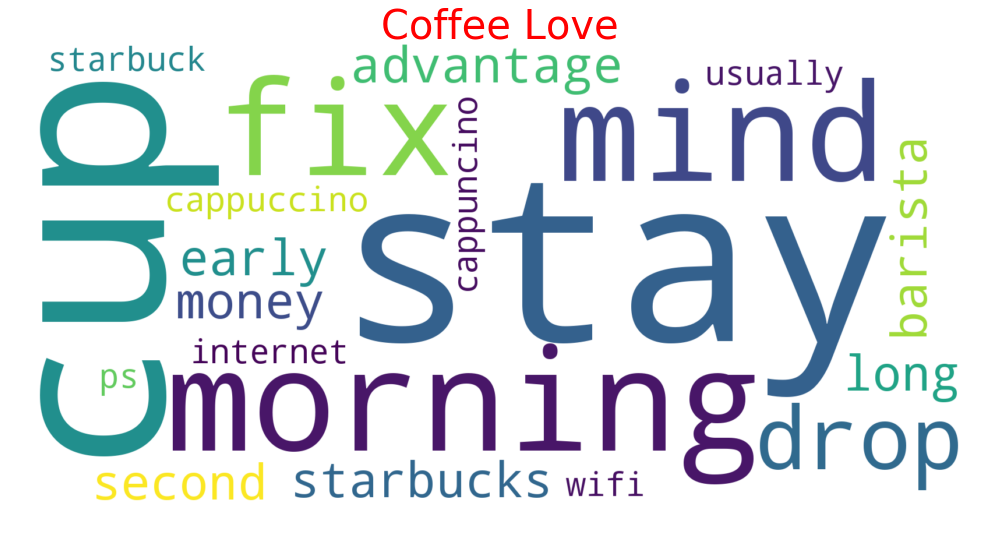

In [42]:
wordcloud.generate_from_frequencies(dict(model.most_similar(['coffee'],['love'],topn=20)))
plt.figure(figsize=(20,10))
plt.title("Coffee Love", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()